# Sales analysis

## Import libraries

In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter

#### Task #1: Merge 12 months of sales data into a single file 

In [109]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data/')]

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])

#all_months_data.to_csv('./Sales_Data/all_data.csv',index = False)

#### Read in updated dataframe 

In [110]:
all_data = pd.read_csv('./Sales_Data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up data!

#### Drop rows of NaN

In [111]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
all_data.dropna(how='all',inplace=True)

In [113]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find and delete 'Or'

In [114]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert quantity and price to numerical

In [115]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

## Add additional columns

#### Task 2: Add month column

In [116]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype(int)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add sales column

In [117]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4: Add a city column

In [118]:
def get_city(address):
    return address.split(',')[1][1:]
    
def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

#### Question 1: What is the best month for sales? How much was earned that month?

In [39]:
results = all_data.groupby('Month').sum()

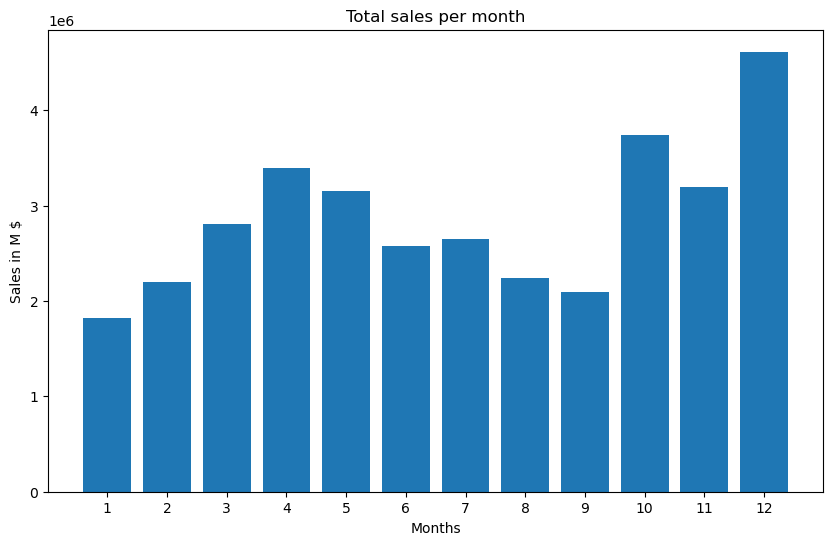

In [40]:
%matplotlib inline

months = np.arange(1,13)
fig , ax = plt.subplots(figsize = (10,6))

ax.bar(months,results['Sales']);

ax.set(
    title = 'Total sales per month',
    xlabel = 'Months',
    ylabel = 'Sales in M $'
);

ax.set_xticks(months);

#### Question 2: What city had the highest number of sales

In [63]:
results =  all_data.groupby('City')['Sales'].sum().reset_index()

In [70]:
results.sort_values(by='Sales', ascending=False)

,City,Sales
8,San Francisco (CA),8262203.91
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
2,Boston (MA),3661642.01
0,Atlanta (GA),2795498.58
3,Dallas (TX),2767975.40
9,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
1,Austin (TX),1819581.75
6,Portland (ME),449758.27


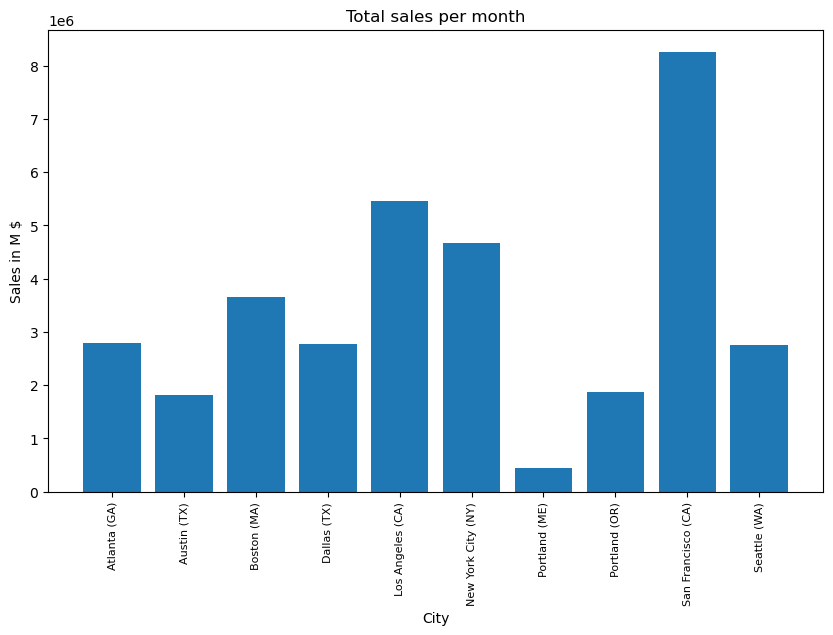

In [72]:
fig , ax = plt.subplots(figsize = (10,6))

cities = results['City']

ax.bar(cities,results['Sales']);

ax.set(
    title = 'Total sales per month',
    xlabel = 'City',
    ylabel = 'Sales in M $'
);

plt.xticks(cities,rotation = 'vertical',size = 8);

#### Question 3: What time should we show advertisments to increase purchasing ?

In [73]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = 'mixed', dayfirst=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [74]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


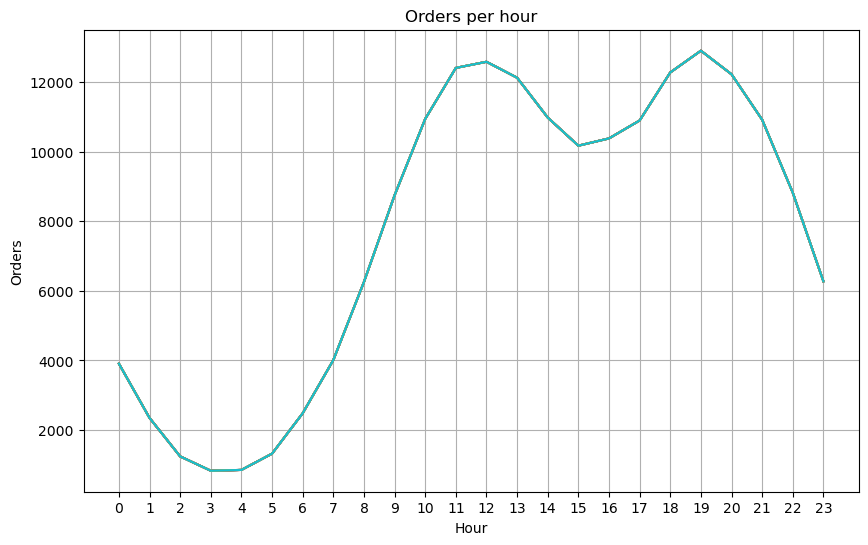

In [75]:
fig , ax = plt.subplots(figsize = (10,6))

results = all_data.groupby('Hour')
hours = [hour for hour, df in results]

ax.plot(hours,results.count());

ax.set(
    title = 'Orders per hour',
    xlabel = 'Hour',
    ylabel = 'Orders'
);
ax.grid()
plt.xticks(hours);

#### Around 11:00 and 18:00-19:00 

In [78]:
sales_per_city_hour = all_data.groupby(['City', 'Hour']).size().reset_index(name='SalesCount')
max_sales_time_per_city = sales_per_city_hour.loc[sales_per_city_hour.groupby('City')['SalesCount'].idxmax()]
max_sales_time_per_city

,City,Hour,SalesCount
19,Atlanta (GA),19,1047
43,Austin (TX),19,685
67,Boston (MA),19,1401
85,Dallas (TX),13,1013
107,Los Angeles (CA),11,2025
139,New York City (NY),19,1753
155,Portland (ME),11,177
180,Portland (OR),12,733
211,San Francisco (CA),19,3106
228,Seattle (WA),12,1012


#### Question 4: What products are most often sold together?

In [106]:
df = pd.DataFrame(all_data[all_data['Order ID'].duplicated(keep=False)])

df_grouped = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

count = Counter()

for row in df_grouped:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

df_pairs = pd.DataFrame( count.most_common(15),columns=['Products', 'Orders'])

df_pairs

,Products,Orders
0,"(iPhone, Lightning Charging Cable)",2140
1,"(Google Phone, USB-C Charging Cable)",2116
2,"(iPhone, Wired Headphones)",987
3,"(Google Phone, Wired Headphones)",949
4,"(iPhone, Apple Airpods Headphones)",799
5,"(Vareebadd Phone, USB-C Charging Cable)",773
6,"(Google Phone, Bose SoundSport Headphones)",503
7,"(USB-C Charging Cable, Wired Headphones)",452
8,"(Vareebadd Phone, Wired Headphones)",327
9,"(Lightning Charging Cable, Wired Headphones)",253


#### Question 5: What product sold the most ? 

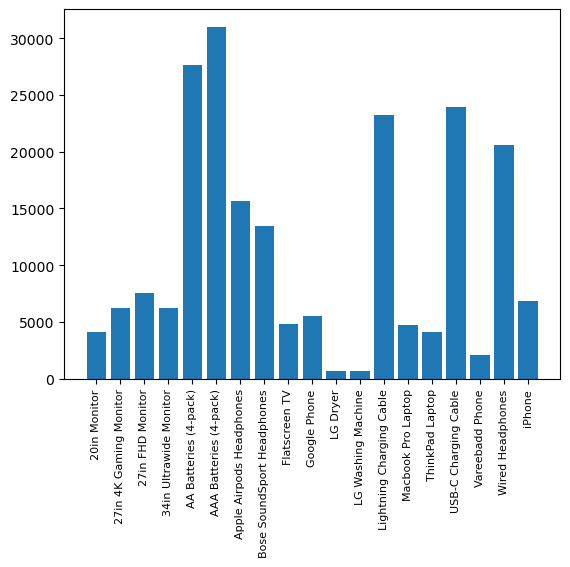

In [99]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only = True)['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

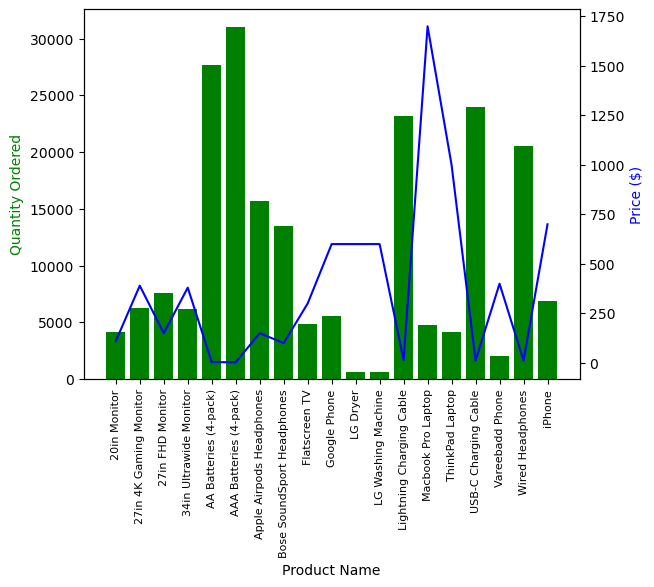

In [104]:

# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticks(keys)
ax1.set_xticklabels(keys, rotation='vertical', size=8);



#### Question 6: How many iphones did Dallas sell in Mars ?

In [127]:
iphones = all_data.loc[(all_data['City'] == 'Dallas (TX)') & (all_data['Month'] == 3 ) & (all_data['Product'] == 'iPhone')]

In [128]:
iphones

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
105289,162033,iPhone,1,700.0,03/19/19 11:06,"267 Johnson St, Dallas, TX 75001",3,700.0,Dallas (TX)
105575,162305,iPhone,1,700.0,03/26/19 17:08,"460 Hickory St, Dallas, TX 75001",3,700.0,Dallas (TX)
105670,162391,iPhone,1,700.0,03/16/19 13:24,"444 Highland St, Dallas, TX 75001",3,700.0,Dallas (TX)
105672,162392,iPhone,1,700.0,03/09/19 10:55,"692 6th St, Dallas, TX 75001",3,700.0,Dallas (TX)
106077,162782,iPhone,1,700.0,03/31/19 13:13,"931 Jefferson St, Dallas, TX 75001",3,700.0,Dallas (TX)
106458,163144,iPhone,1,700.0,03/27/19 23:50,"160 West St, Dallas, TX 75001",3,700.0,Dallas (TX)
106705,163376,iPhone,1,700.0,03/04/19 15:51,"694 11th St, Dallas, TX 75001",3,700.0,Dallas (TX)
106743,163414,iPhone,1,700.0,03/11/19 16:13,"630 Lake St, Dallas, TX 75001",3,700.0,Dallas (TX)
106991,163653,iPhone,1,700.0,03/31/19 17:42,"845 Church St, Dallas, TX 75001",3,700.0,Dallas (TX)
107535,164174,iPhone,1,700.0,03/27/19 22:16,"483 Cherry St, Dallas, TX 75001",3,700.0,Dallas (TX)


In [129]:
iphones['Quantity Ordered'].sum()

35